## <center style="color:red">**News Classifier**</center>

### <center>**ML Pipeline with Sentence Transformers, ChromaDB & Airflow**</center>

Ce projet vise à construire un pipeline complet de classification de textes permettant de catégoriser automatiquement des articles d’actualité dans 4 classes :

- World
- Sports
- Business
- Sci/Tech

Le pipeline utilise des techniques NLP avancées, des embeddings vectoriels, une base de données vectorielle et une orchestration via Apache Airflow.

<br>

### <span style="color:green">**Analyse Exploratoire des Données :**</span>

#### <span style="color:orange">**1. Chargement des Données :**</span>

In [38]:
import pandas as pd

df_train = pd.read_csv("../data/raw/train.csv")

df_test = pd.read_csv("../data/raw/test.csv")

print("Données Chargées avec Succès !")

Données Chargées avec Succès !


In [39]:
df_train.shape

(120000, 3)

In [40]:
df_test.shape

(7600, 3)

In [41]:
df_train.columns

Index(['text', 'label', 'label_text'], dtype='object')

In [42]:
df_train.dtypes

text          object
label          int64
label_text    object
dtype: object

#### <span style="color:orange">**2. Analyser la Distribution des Classes :**</span>

In [43]:
df_train_grouped = df_train.groupby("label")["text"].count()

df_train_grouped

label
0    30000
1    30000
2    30000
3    30000
Name: text, dtype: int64

In [44]:
df_test_grouped = df_test.groupby("label")["text"].count()

df_test_grouped

label
0    1900
1    1900
2    1900
3    1900
Name: text, dtype: int64

#### <span style="color:orange">**3. Afficher la Longueur Moyenne des Textes :**</span>

In [45]:
df_train["text_length"] = df_train["text"].apply(
    lambda row : len(row.split())
)

df_train_grouped = df_train.groupby("label")["text_length"].mean()

df_train_grouped

label
0    38.884867
1    37.774733
2    37.538233
3    37.191967
Name: text_length, dtype: float64

In [46]:
df_test["text_length"] = df_test["text"].apply(
    lambda row : len(row.split())
)

df_test_grouped = df_test.groupby("label")["text_length"].mean()

df_test_grouped

label
0    38.547368
1    37.565263
2    37.627895
3    37.148947
Name: text_length, dtype: float64

#### <span style="color:orange">**4. Détecter les Valeurs Manquantes :**</span>

In [47]:
df_train.isnull().sum()

text           0
label          0
label_text     0
text_length    0
dtype: int64

In [48]:
df_test.isnull().sum()

text           0
label          0
label_text     0
text_length    0
dtype: int64

#### <span style="color:orange">**5. Détecter les Doublons :**</span>

In [49]:
df_train.duplicated().sum()

np.int64(0)

In [50]:
df_test.duplicated().sum()

np.int64(0)

#### <span style="color:orange">**6. Analyser les Statistiques Globales :**</span>

In [51]:
df_train.describe(include="all")

,text,label,label_text,text_length
count,120000,120000.000000,120000,120000.000000
unique,120000,NaN,4,NaN
top,Insurgents Attack Iraq Election Offices (Reute...,NaN,Business,NaN
freq,1,NaN,30000,NaN
mean,NaN,1.500000,NaN,37.847450
std,NaN,1.118039,NaN,10.085245
min,NaN,0.000000,NaN,8.000000
25%,NaN,0.750000,NaN,32.000000
50%,NaN,1.500000,NaN,37.000000
75%,NaN,2.250000,NaN,43.000000


In [52]:
df_test.describe(include="all")

,text,label,label_text,text_length
count,7600,7600.000000,7600,7600.000000
unique,7600,NaN,4,NaN
top,Right-hander must pass physical Right-hander M...,NaN,Business,NaN
freq,1,NaN,1900,NaN
mean,NaN,1.500000,NaN,37.722368
std,NaN,1.118108,NaN,10.129860
min,NaN,0.000000,NaN,11.000000
25%,NaN,0.750000,NaN,32.000000
50%,NaN,1.500000,NaN,37.000000
75%,NaN,2.250000,NaN,43.000000


#### <span style="color:orange">**7. WordCloud :**</span>

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


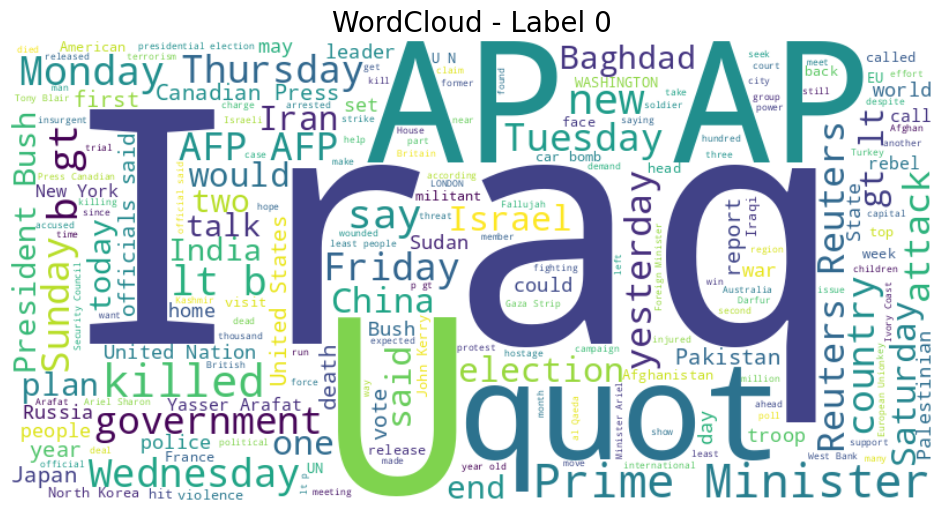

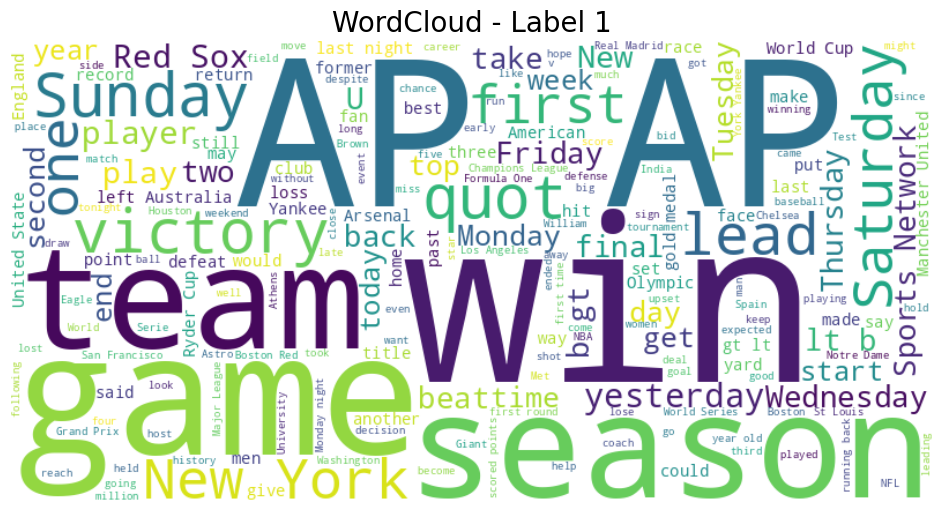

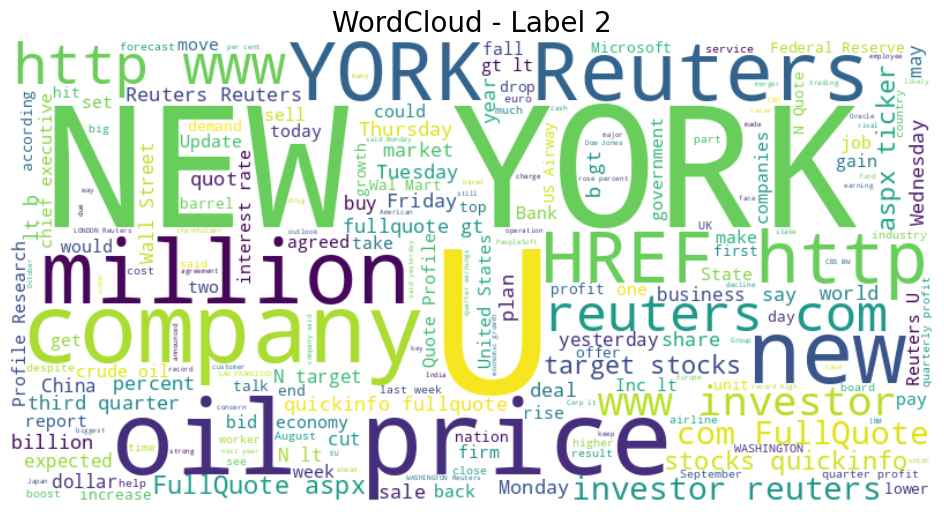

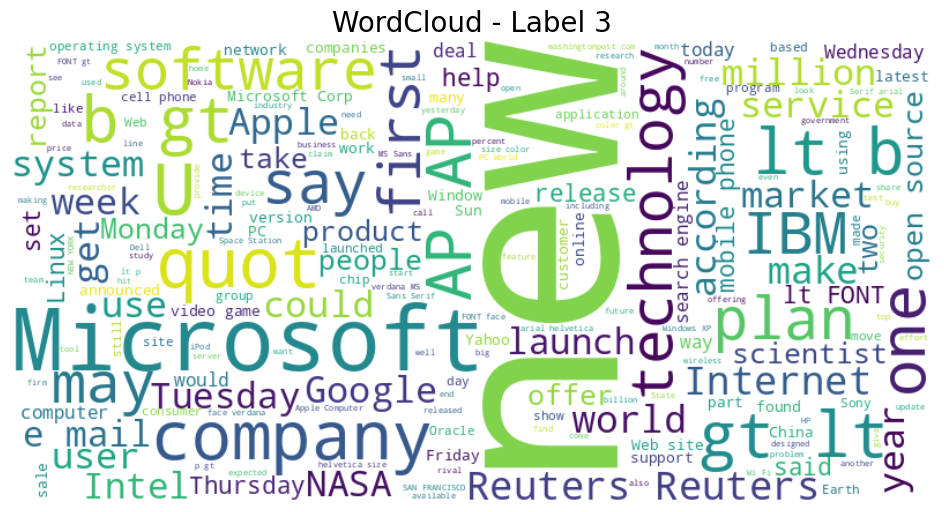

In [ ]:
for i in range(0,4) :
    train_text = " ".join(df_train[df_train["label"] == i]["text"].astype(str).str.strip())

    spam_wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        stopwords=stop_words
    ).generate(train_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(spam_wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud Train - Label {i}", fontsize=20)
    plt.show()

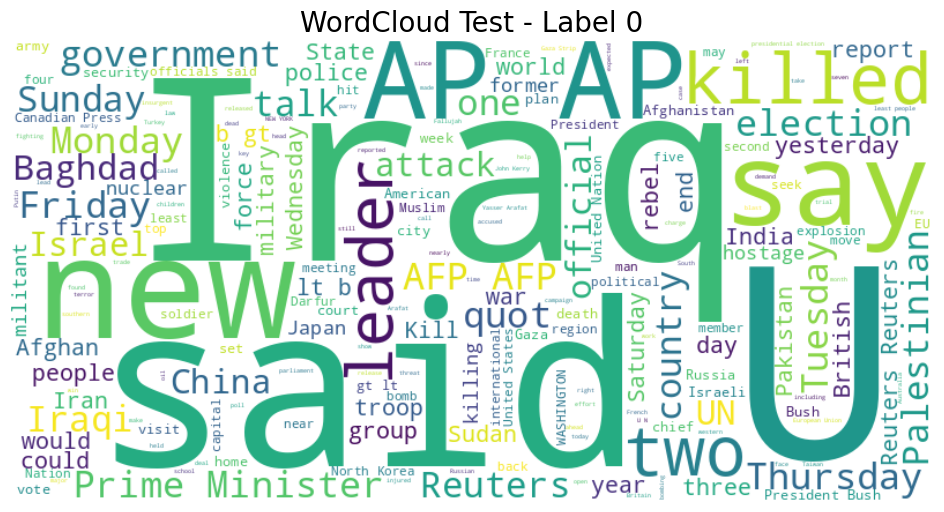

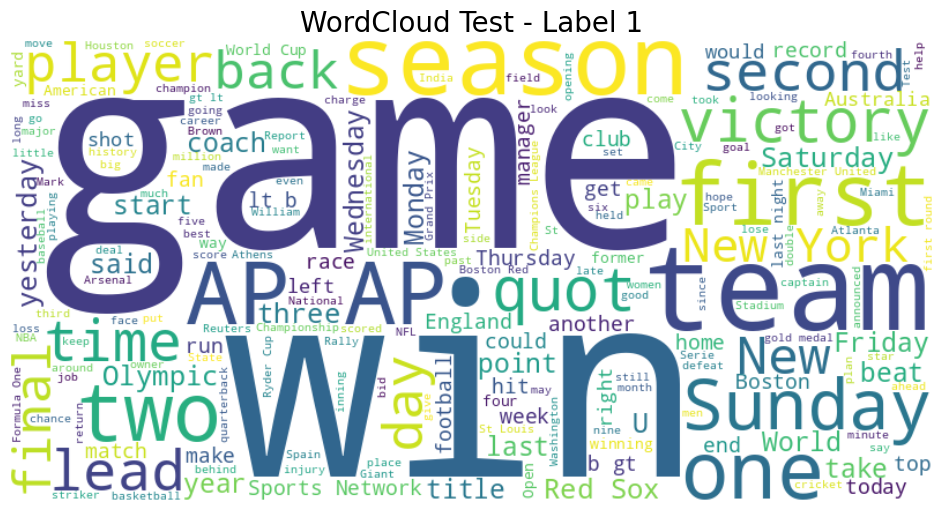

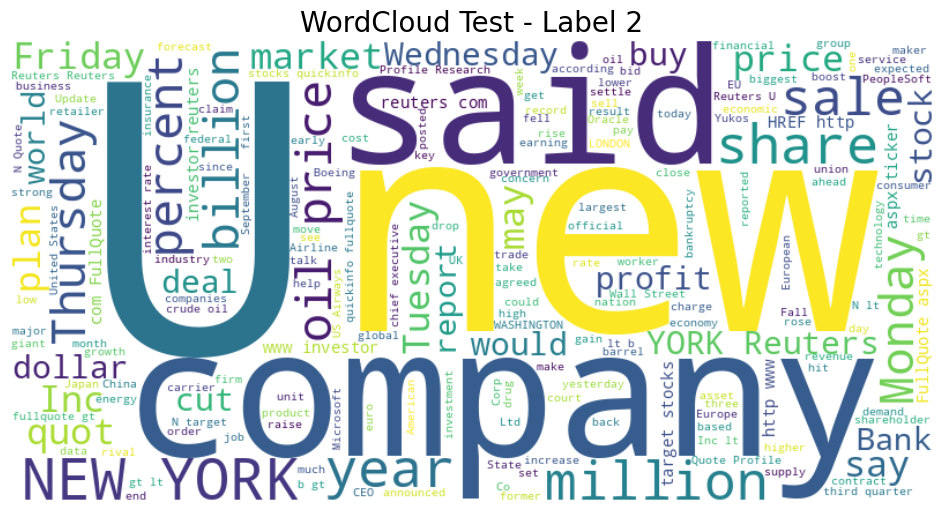

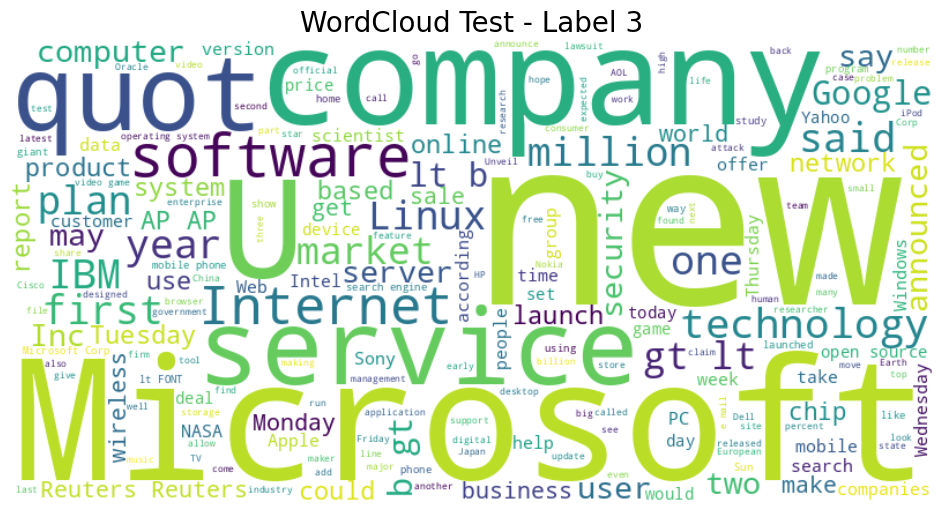

In [67]:
for i in range(0,4) :
    test_text = " ".join(df_test[df_test["label"] == i]["text"].astype(str).str.strip())

    spam_wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        stopwords=stop_words
    ).generate(test_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(spam_wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud Test - Label {i}", fontsize=20)
    plt.show()

#### <span style="color:orange">**8. Enregistrer les Données :**</span>

In [71]:
df_train = df_train[["text","label"]]
df_test = df_test[["text","label"]]

df_train.to_csv("../data/clean/train.csv", index=False)
df_test.to_csv("../data/clean/test.csv", index=False)

print("Dataframes Sauvegardées avec Succès !")

Dataframes Sauvegardées avec Succès !
